# Helpful (hopefully) notes and general measurement tips

- **Spectrum Analyzer:** The spectrum analyzer tends to timeout if it hasn't been used in a while. To restart it, simply execute the qubit initialization again or use the qb._instrument.set() command to send a value and wake the instrument back up.
- 

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from qubit import qubit
import numpy as np
import plot_functions as pf
# from instrument_init import init_sa

# Initialize qubit

In [234]:
qb = qubit('ocs2')

Loading parameter JSON file
2024-04-05 18:37:06,990 - qm - INFO     - Performing health check
2024-04-05 18:37:07,005 - qm - INFO     - Health check passed
Loading instrument settings from experiments\test\test_instruments.json.
Initializing readout_LO (BNC 845 Signal Generator).
Initializing qubit_LO (SignalCore SC5506A Signal Generator).
Initializing DA (Vaunix Lab Brick Digital Attenuator).
Initializing sa (SignalHound SpectrumAnalyzer).
Setting readout_LO frequency to 7820000000.0.
Setting readout_LO output to True.
Setting qubit_LO frequency to 4480000000.
Setting qubit_LO power to 17.
Setting qubit_LO output to True.
Setting DA attenuation to 10.


# Time of flight

For tof calibration, we don't need the resontor frequency per se

In [ ]:
qb.update_value('readout_atten',0)
qb.update_value('tof',56) #clock cycles
qb.update_value('smearing',10)
qb.update_value('n_avg',1000)
qb.update_value('rr_IF',5e6) 
qb.update_value('readout_length',1000)

adc1,adc2 = qb.tof_cal(update_tof=True)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

In [ ]:
adc1,adc2 = qb.tof_cal(update_tof=True)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

**Note:** execute the following cell to visually see if the tof is calibrated

2024-04-05 16:07:11,322 - qm - INFO     - Performing health check
2024-04-05 16:07:11,335 - qm - INFO     - Health check passed
2024-04-05 16:07:11,698 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 16:07:11,735 - qm - INFO     - Executing program
Input 1 Offset: 0.07672060780316235 mV
Input 2 Offset: -0.11302101165649901 mV
Updating analog_input_offsets to [0.03792003714276485, 0.07340324288305572]


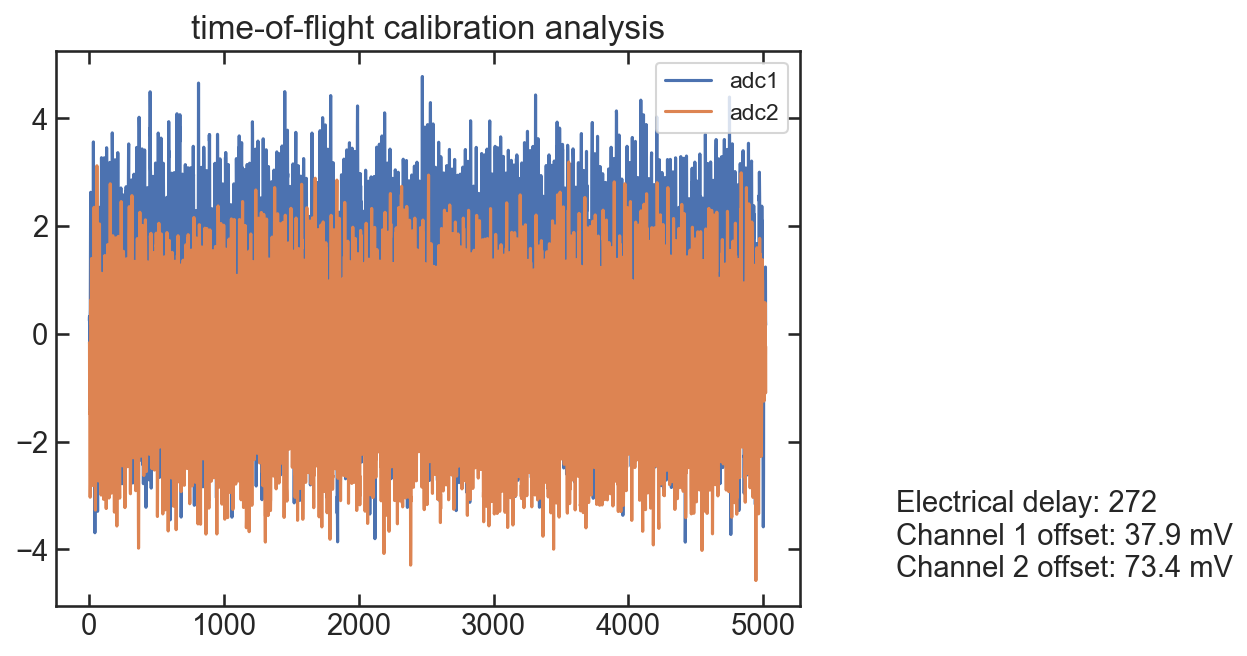

In [139]:
adc1,adc2 = qb.tof_cal(update_tof=False)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

# Optimize Mixers

Starting with the smallest resonator

In [ ]:
LO_freq = 7.5e9 #Hz (targets the smallest resonator)

In [172]:
# qb.update_value('rr_freq',7.6146e9)
qb.pars['rr_IF']

50000000.0

## Minimize LO leakage 

## Resonator

Updating rr_LO to 7564600000.0
Setting readout_LO frequency to 7564600000.0.
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7564600000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.
LO at 7.5646 GHz
Current I_offset = -10.1 mV, Current Q_offset = 2.9 mV
Setting sa frequency to 7564600000.0.
Setting sa span to 500000.0.
Setting sa threshold to -29.91663360595703.
Setting sa bandwidth to 1000.0.


100%|██████████| 121/121 [00:13<00:00,  9.10it/s]


Updating rr_mixer_offsets to [-0.011149999999999997, 0.002850000000000001]
optimal I_offset = -11.1 mV, optimal Q_offset = 2.9 mV
Updating readout_atten to 10
Setting DA attenuation to 10.
Power: -82.51262664794922 dBm at 7.5646 GHz


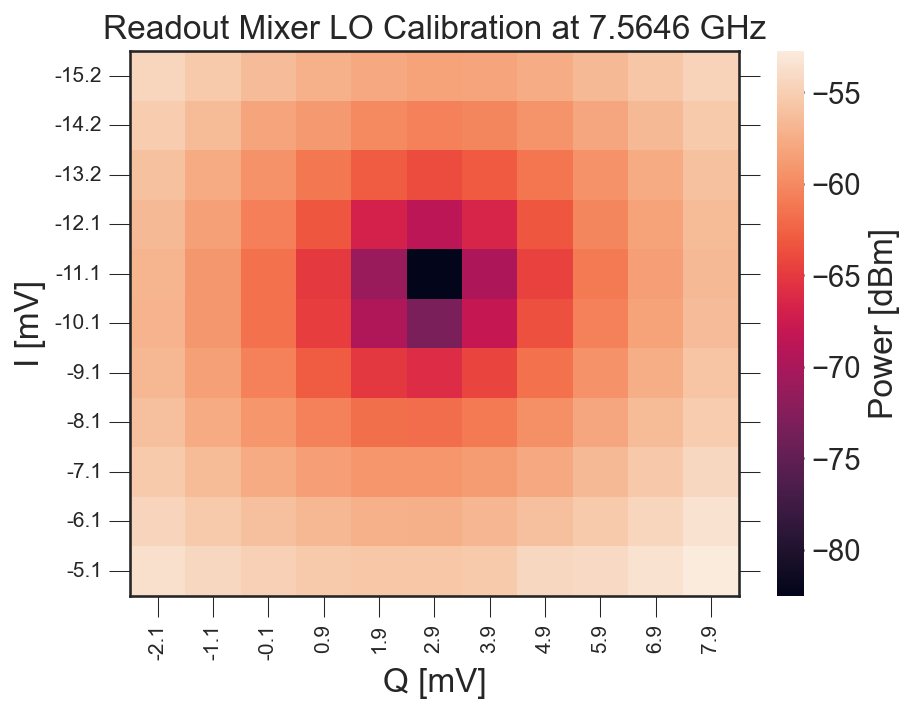

In [173]:
# qb.update_value('rr_LO',LO_freq)
qb.update_value('rr_LO',qb.pars['rr_freq']-qb.pars['rr_IF'])
# qb.get_power(fc=qb.pars['rr_LO'],threshold=-20,span=1e6,config=True,plot=True)
qb.opt_lo_leakage(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

## Minimize image sideband

Updating rr_IF to 50000000.0
2024-04-05 17:01:21,269 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 17:01:21,369 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7514600000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.


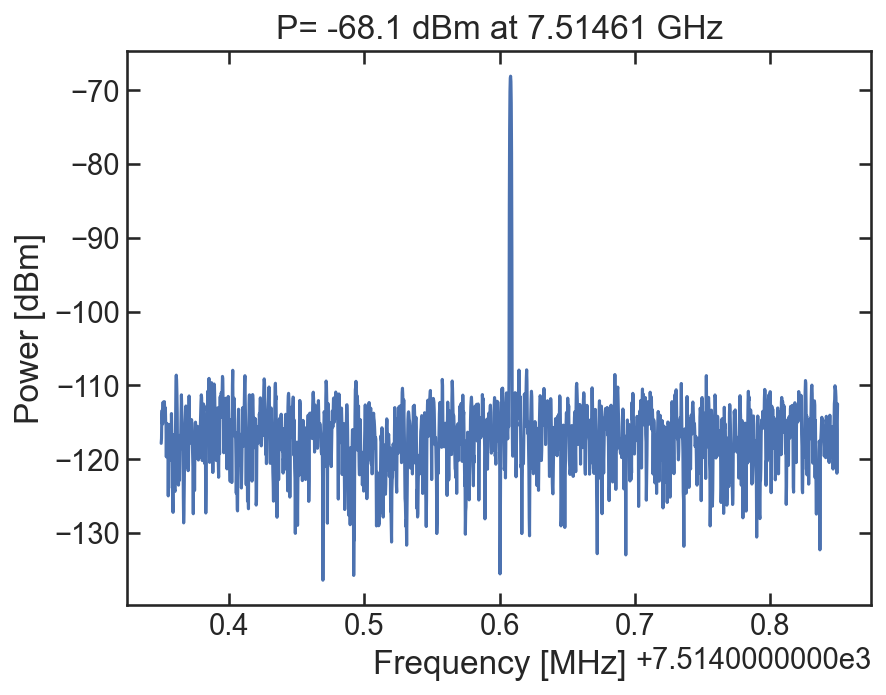

-68.11158752441406 dBm at 7.514608206514376 GHz
Sideband at 7.5146 GHz
Current gain = 0.0111, Current phase = -0.0278


100%|██████████| 100/100 [00:10<00:00,  9.56it/s]


Updating rr_mixer_imbalance to (0.0, -0.05555555555555558)
optimal gain = 0.0, optimal phi = -0.0556
Updating readout_atten to 10
Setting DA attenuation to 10.
Power: -68.0829849243164 dBm at 7.5146 GHz


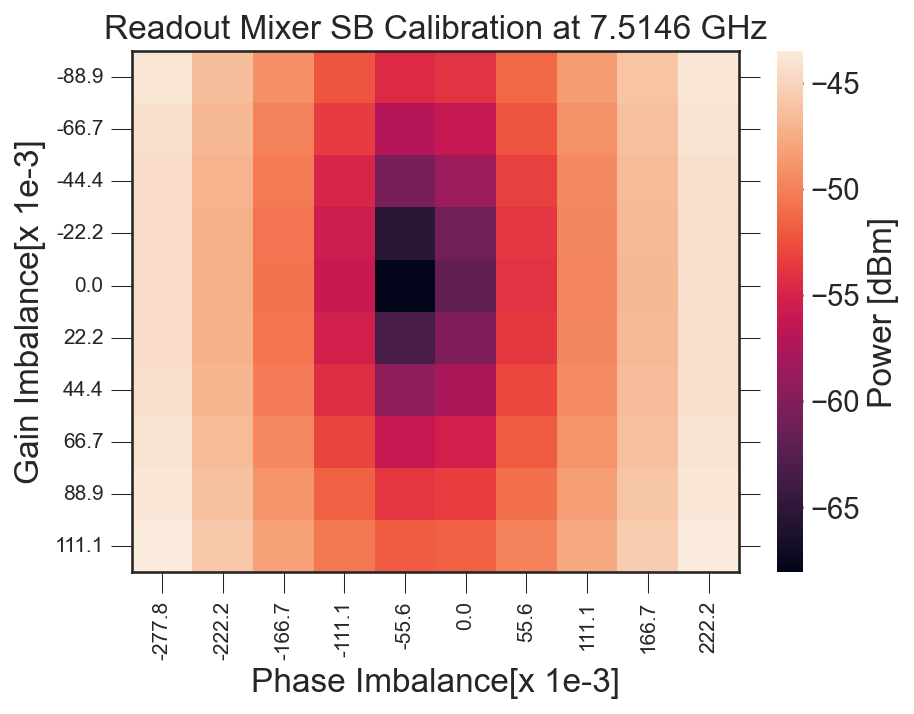

In [174]:
qb.update_value('rr_IF',50e6)
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

In [ ]:
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.5e6,threshold=-50,plot=True)

# Resonator spectroscopy

**Notes on resonator spectroscopy**

In [276]:
IF_min, IF_max = 36e6, 41.5e6
df_resonator_spec = 0.05e6

In [244]:
job.execution_report()

Execution report for job 1712187455465
Errors:
Please refer to section: Error Indications and Error Reporting in documentation for additional information

code		severity	message
10004		Error		Overflow error in update frequency of controller con2 - must be between -5e8 and 5e8

In [279]:
qb.update_value('readout_length', 5000)   #ns (since resonator is narrow)
qb.pars['resettime']['rr'] = 5000 # clock cycles
qb.write_pars()
qb.update_value('n_avg',3000)
qb.update_value('readout_atten',10)
df_resonator_spec = 0.05e6
qb.experiment = 'resonator_spec'
##added a 10db fixed attenuator on rr line after the spiltter and just before fridge input
data, job = qb.resonator_spec(
                       f_LO = 7.8e9,
                       IF_min = IF_min,
                       IF_max = IF_max,
                       df = df_resonator_spec,
                       fit=True,
                       on_off=False,
                       savedata=True,
                       showprogress=True)

Updating readout_length to 5000
Updating n_avg to 3000
Updating readout_atten to 10
Setting DA attenuation to 10.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 19:11:08,114 - qm - INFO     - Performing health check
2024-04-05 19:11:08,126 - qm - INFO     - Health check passed
2024-04-05 19:11:08,519 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 19:11:08,640 - qm - INFO     - Executing program


100%|█████████▉| 2999/3000 [00:13<00:00, 220.77it/s]


Saving data to G:\Shared drives\CavityCooling\DARPA\data\darpa2A\20240405\resonator_spec\rr


Resonant Frequency: 7.83855 GHz
FWHM = 0.7999999999999999 MHz
kappa = 5.027 MHz


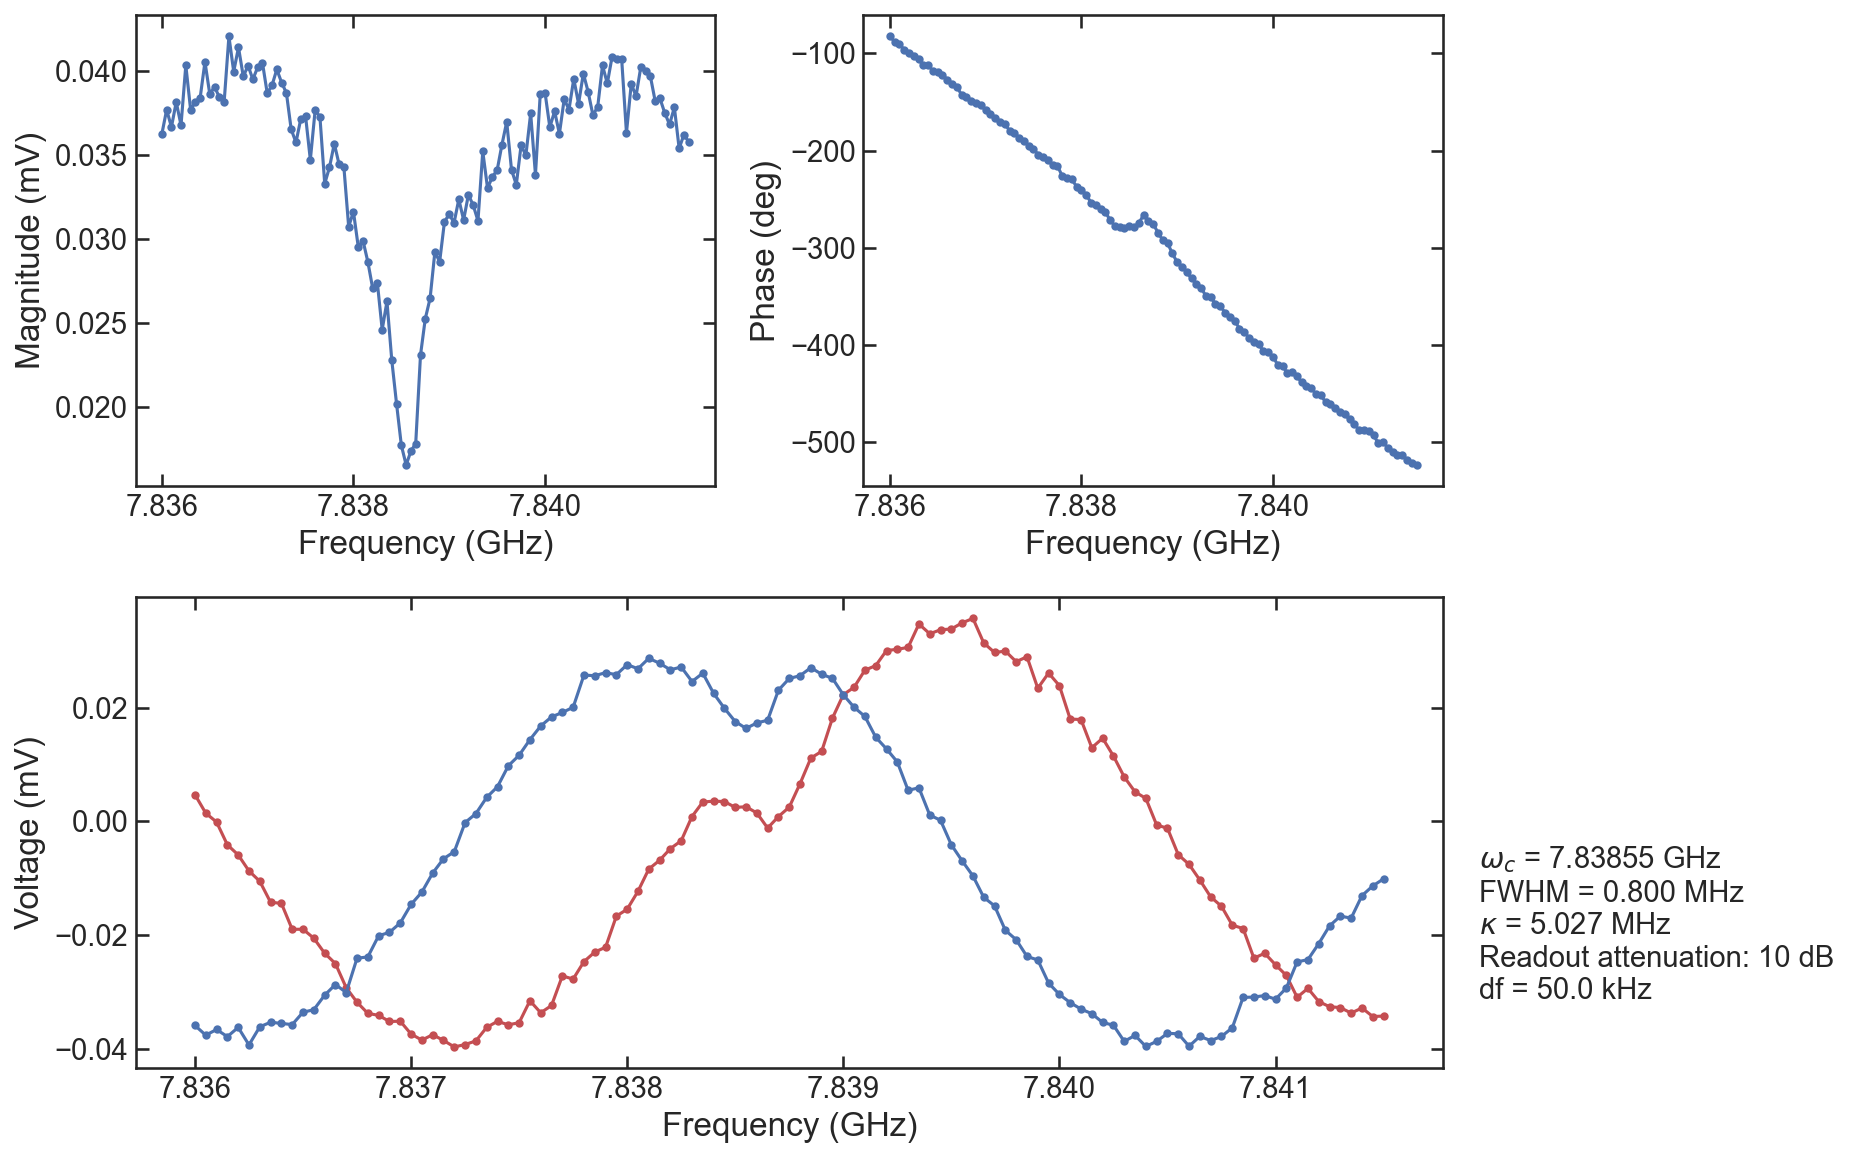

In [280]:
fc,fwhm = pf.fit_res(data['freqs'],data['I'],data['Q'])
pf.resonator_spec_plot(data,qb_pars=qb.pars,fwhm=fwhm,fc=fc)

In [273]:
from resonator import Resonator

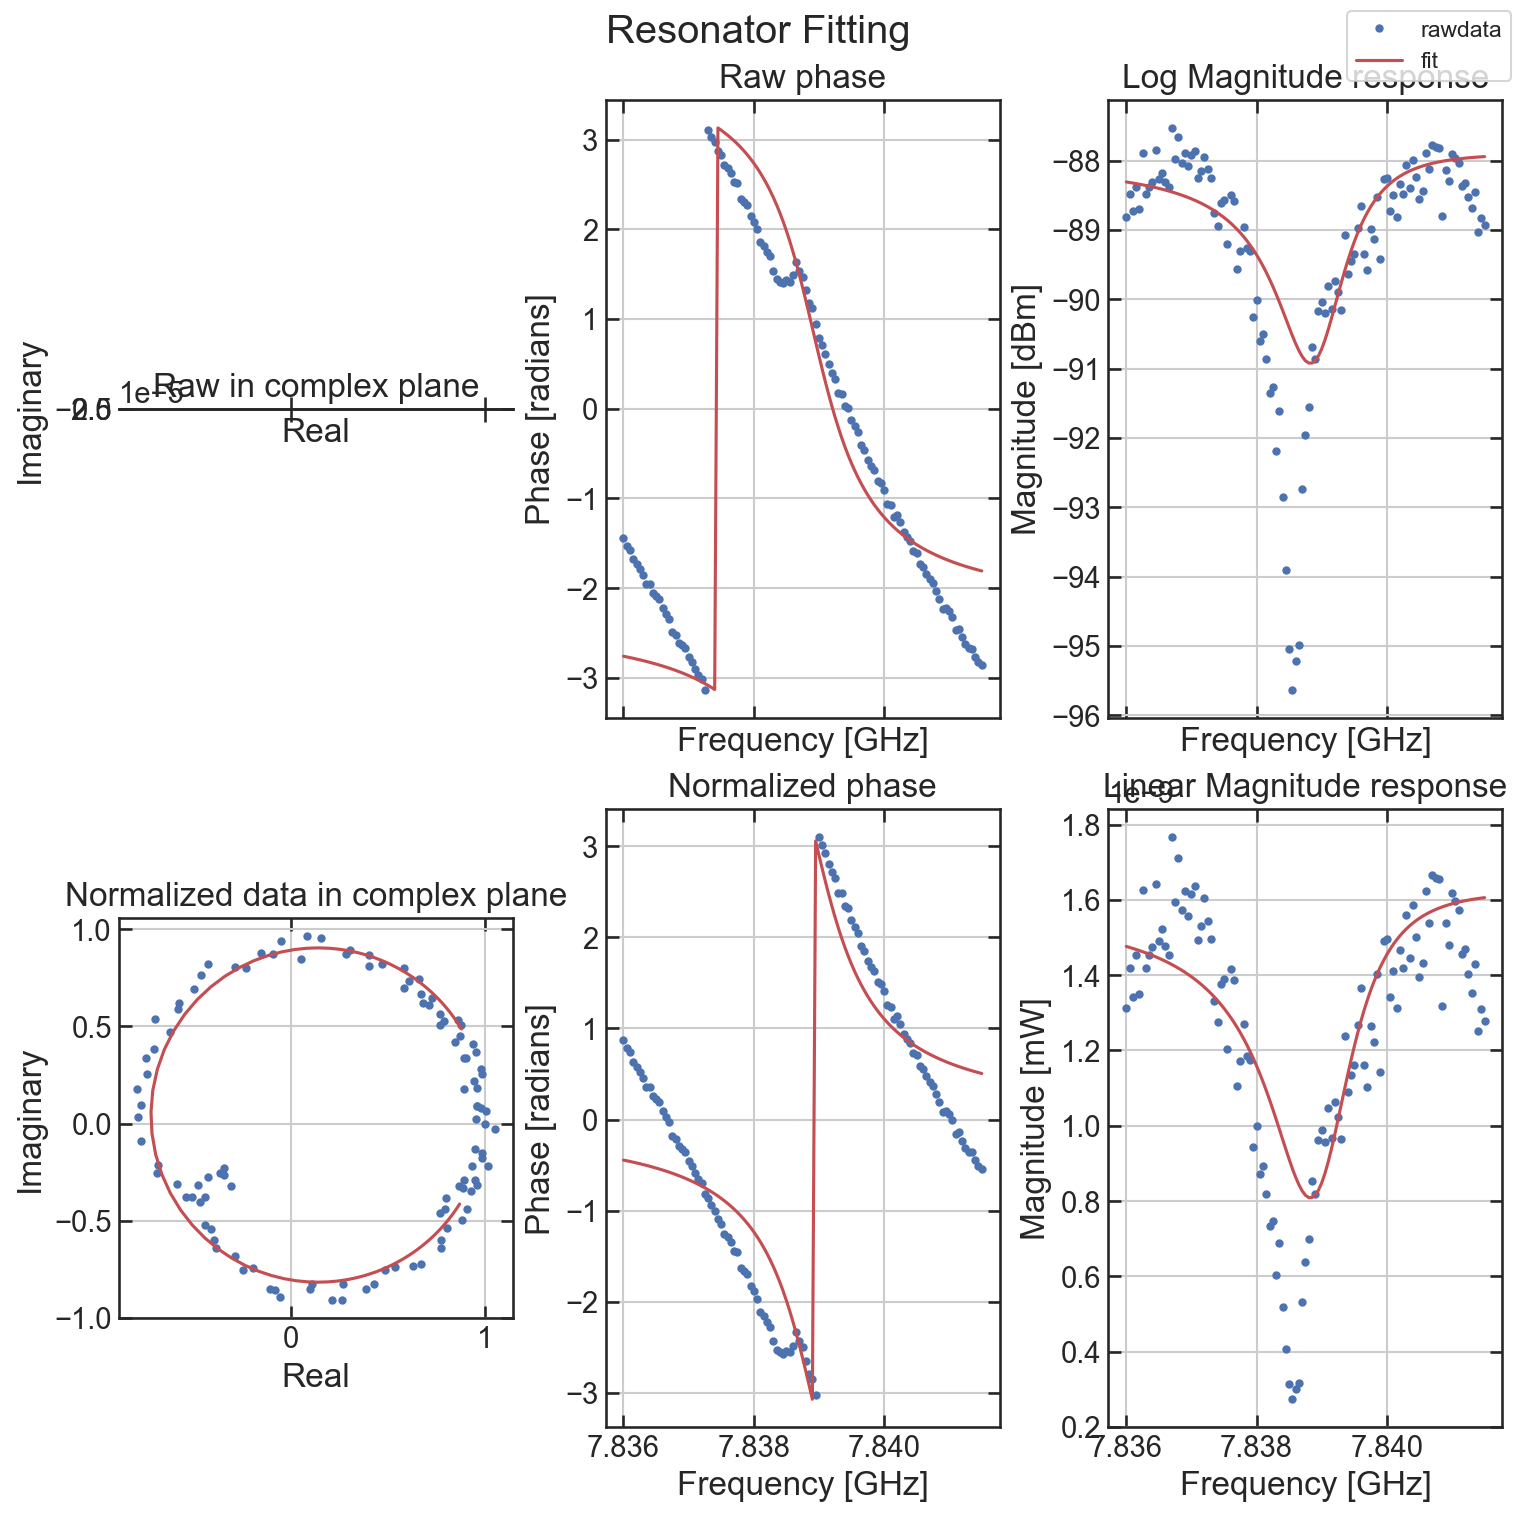

In [283]:
res = Resonator(port_type='n',f_data=data['freqs'],z_data=data['I']+1j*data['Q'])
res.autofit(electric_delay=0)
res.show()

# Qubit Punchout

In [253]:
attenuations = np.arange(0,50,5)
qb.update_value('n_avg',2000)
data, job = qb.punchout(df = 0.05e6,
                 IF_min = IF_min,
                 IF_max = IF_max,
                 attenuations=attenuations,
                 savedata=False)

Updating n_avg to 2000


  0%|          | 0/10 [00:00<?, ?it/s]

Attenuation = 0 dB
Setting DA attenuation to 0.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:54:45,178 - qm - INFO     - Performing health check
2024-04-05 18:54:45,190 - qm - INFO     - Health check passed
2024-04-05 18:54:45,631 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:54:45,751 - qm - INFO     - Executing program


 10%|█         | 1/10 [00:17<02:36, 17.43s/it]

Attenuation = 5 dB
Setting DA attenuation to 5.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:55:02,441 - qm - INFO     - Performing health check
2024-04-05 18:55:02,453 - qm - INFO     - Health check passed
2024-04-05 18:55:02,833 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:55:02,931 - qm - INFO     - Executing program


 20%|██        | 2/10 [00:34<02:18, 17.29s/it]

Attenuation = 10 dB
Setting DA attenuation to 10.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:55:19,636 - qm - INFO     - Performing health check
2024-04-05 18:55:19,648 - qm - INFO     - Health check passed
2024-04-05 18:55:20,020 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:55:20,140 - qm - INFO     - Executing program


 30%|███       | 3/10 [00:51<02:00, 17.27s/it]

Attenuation = 15 dB
Setting DA attenuation to 15.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:55:36,886 - qm - INFO     - Performing health check
2024-04-05 18:55:36,898 - qm - INFO     - Health check passed
2024-04-05 18:55:37,263 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:55:37,366 - qm - INFO     - Executing program


 40%|████      | 4/10 [01:09<01:43, 17.23s/it]

Attenuation = 20 dB
Setting DA attenuation to 20.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:55:54,057 - qm - INFO     - Performing health check
2024-04-05 18:55:54,068 - qm - INFO     - Health check passed
2024-04-05 18:55:54,437 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:55:54,562 - qm - INFO     - Executing program


 50%|█████     | 5/10 [01:26<01:26, 17.24s/it]

Attenuation = 25 dB
Setting DA attenuation to 25.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:56:11,303 - qm - INFO     - Performing health check
2024-04-05 18:56:11,316 - qm - INFO     - Health check passed
2024-04-05 18:56:11,686 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:56:11,815 - qm - INFO     - Executing program


 60%|██████    | 6/10 [01:43<01:09, 17.26s/it]

Attenuation = 30 dB
Setting DA attenuation to 30.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:56:28,610 - qm - INFO     - Performing health check
2024-04-05 18:56:28,621 - qm - INFO     - Health check passed
2024-04-05 18:56:28,970 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:56:29,211 - qm - INFO     - Executing program


 70%|███████   | 7/10 [02:00<00:51, 17.25s/it]

Attenuation = 35 dB
Setting DA attenuation to 35.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:56:45,844 - qm - INFO     - Performing health check
2024-04-05 18:56:45,856 - qm - INFO     - Health check passed
2024-04-05 18:56:46,216 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:56:46,346 - qm - INFO     - Executing program


 80%|████████  | 8/10 [02:18<00:34, 17.25s/it]

Attenuation = 40 dB
Setting DA attenuation to 40.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:57:03,094 - qm - INFO     - Performing health check
2024-04-05 18:57:03,106 - qm - INFO     - Health check passed
2024-04-05 18:57:03,517 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:57:03,641 - qm - INFO     - Executing program


 90%|█████████ | 9/10 [02:35<00:17, 17.28s/it]

Attenuation = 45 dB
Setting DA attenuation to 45.
Updating rr_LO to 7800000000.0
Setting readout_LO frequency to 7800000000.0.
5000
2024-04-05 18:57:20,415 - qm - INFO     - Performing health check
2024-04-05 18:57:20,428 - qm - INFO     - Health check passed
2024-04-05 18:57:20,799 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:57:20,934 - qm - INFO     - Executing program


100%|██████████| 10/10 [02:52<00:00, 17.26s/it]

Setting DA attenuation to 10.


Dispersive shift: 1201619.8 kHz
Resonant Frequency: 0.00000 GHz
FWHM = 4.499999999998394e-10 MHz
kappa = 0.000 MHz
Resonant Frequency: 0.00000 GHz
FWHM = 1.0000000000065512e-10 MHz
kappa = 0.000 MHz


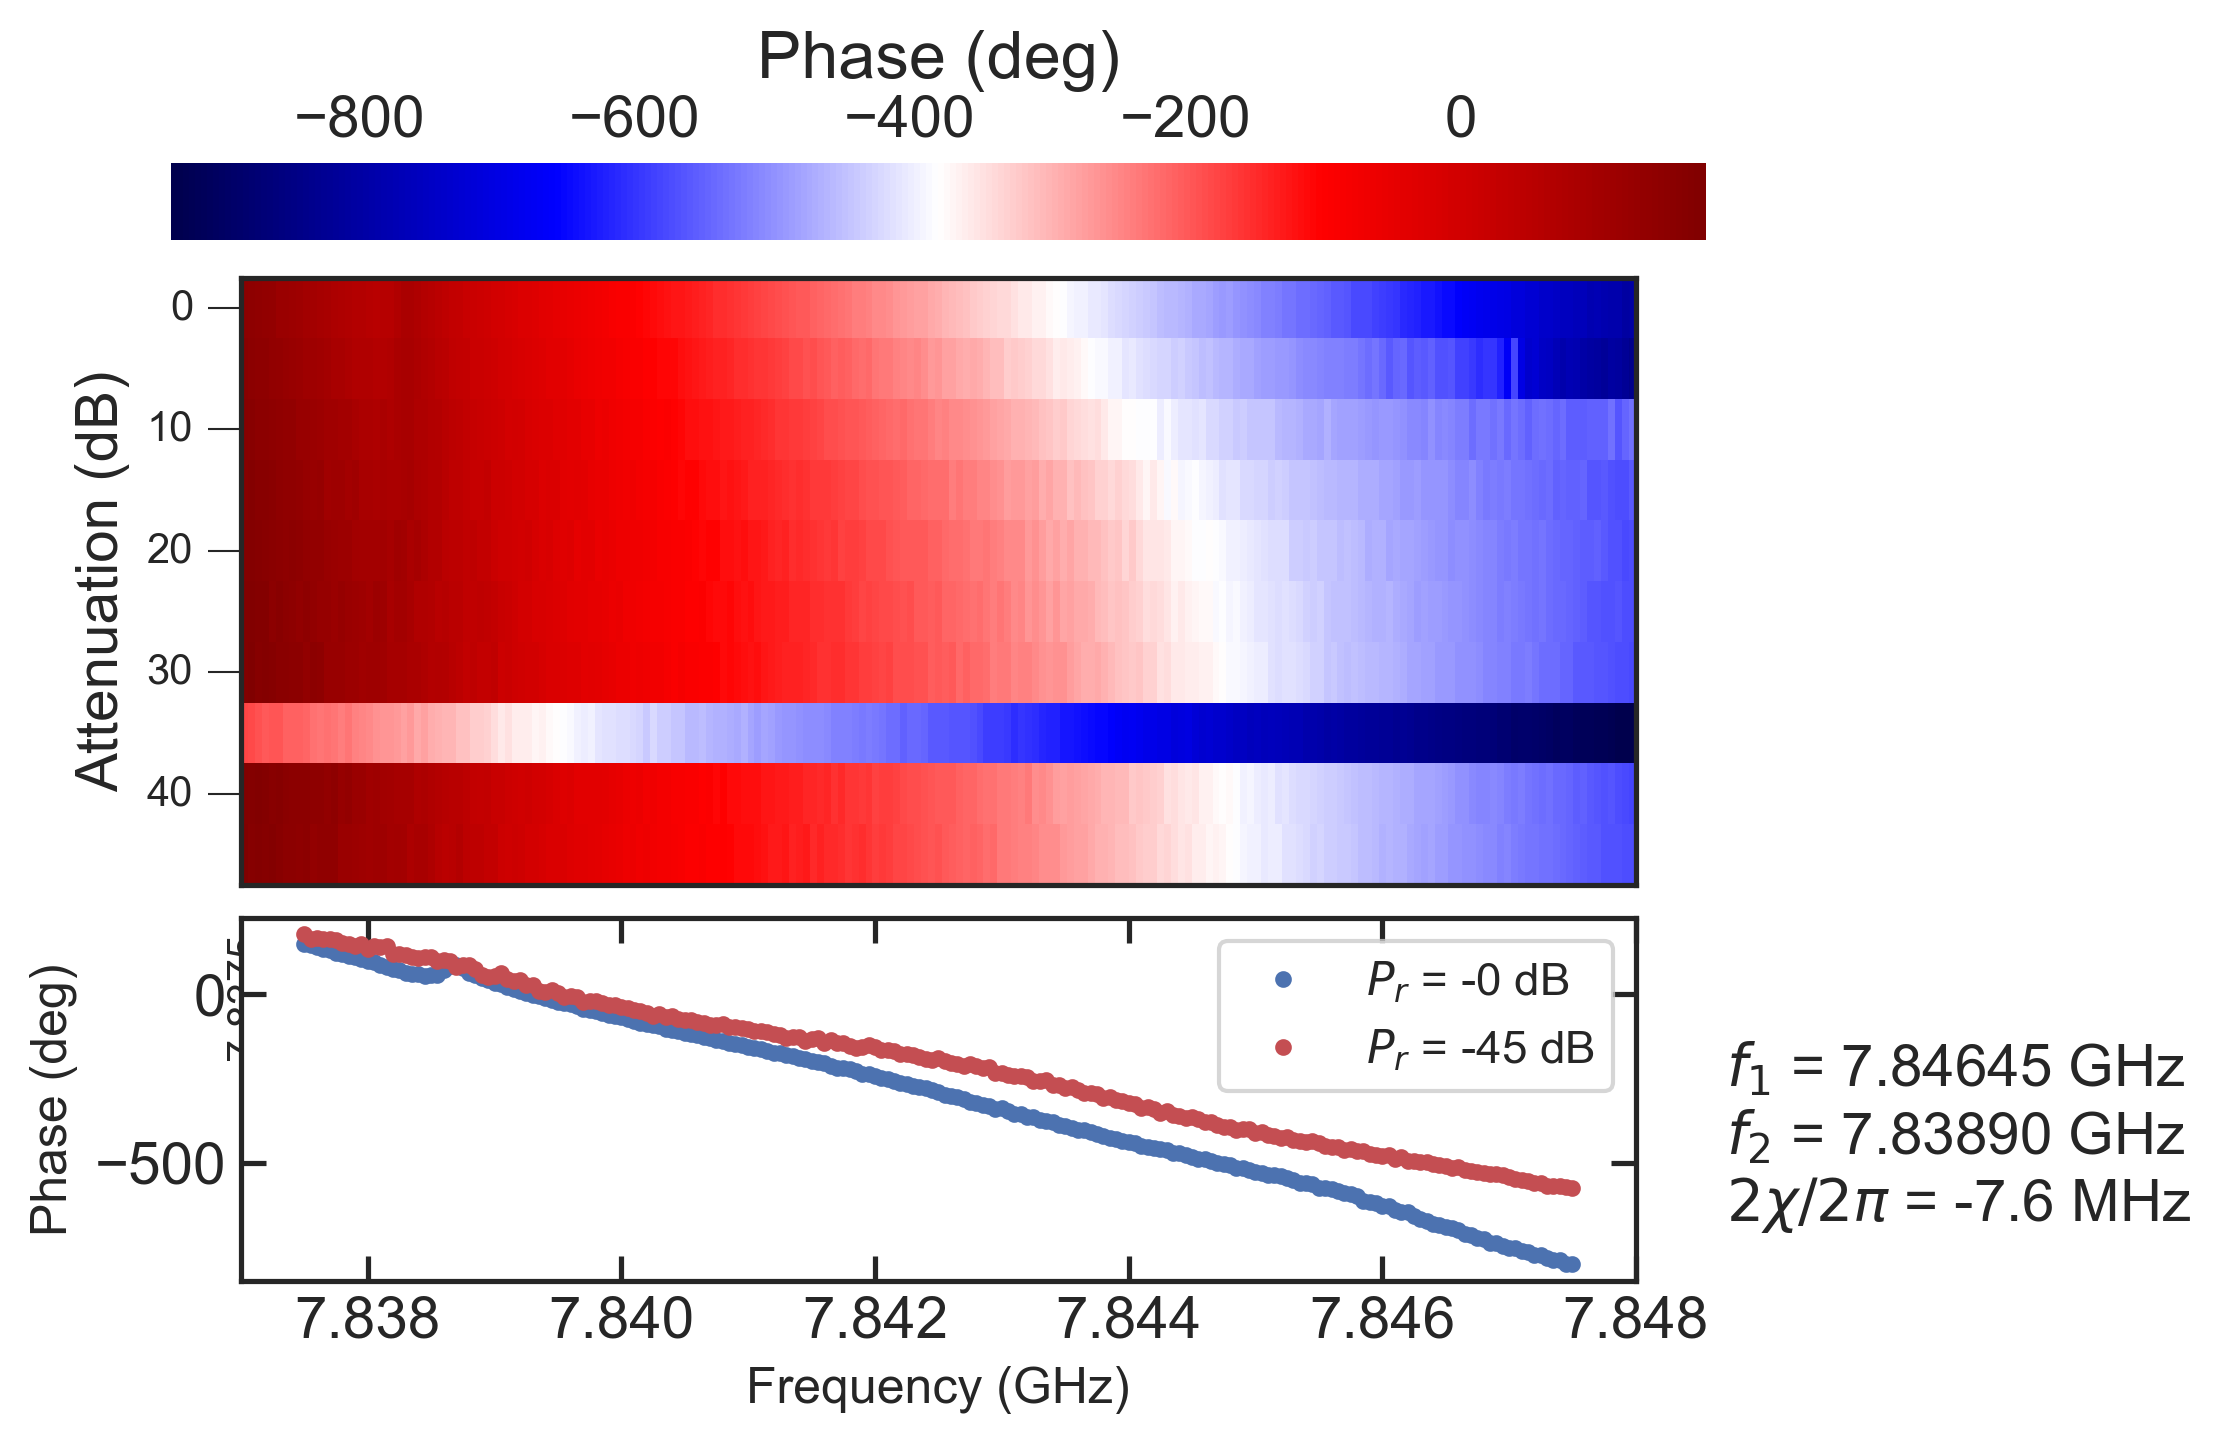

In [254]:
pf.punchout_plot(data,xlabel='Frequency (GHz)',ylabel='Attenuation (dB)',cbar_label='Phase (deg)')

In [ ]:
qb.update_value('rr_atte')

# Qubit Spectroscopy

The first time we run qubit spectroscopy we have to use a high qubit driving amplitude for a couple of reasons. 
1. Detect higher levels like $\omega_{02}/2$ and $\omega_{03}/3$ so you can calculate anharmonicity.
2. Since you don't know exactly what the qubit frequency is going to be (unless you've nailed the fab process), you will have to execute a broad sweep. Driving the qubit at high power broadens the resonance (decreases coherence), makes it easier to detect $\omega_{01}$ -> frequency spacing can be larger.

## Narrow search

In [225]:
qb.pars['qubit_IF']

50000000.0

Updating qubit_LO to 6300000000.0
Setting qubit_LO frequency to 6300000000.0.
Setting sa frequency to 6300000000.0.
Setting sa span to 1000000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.


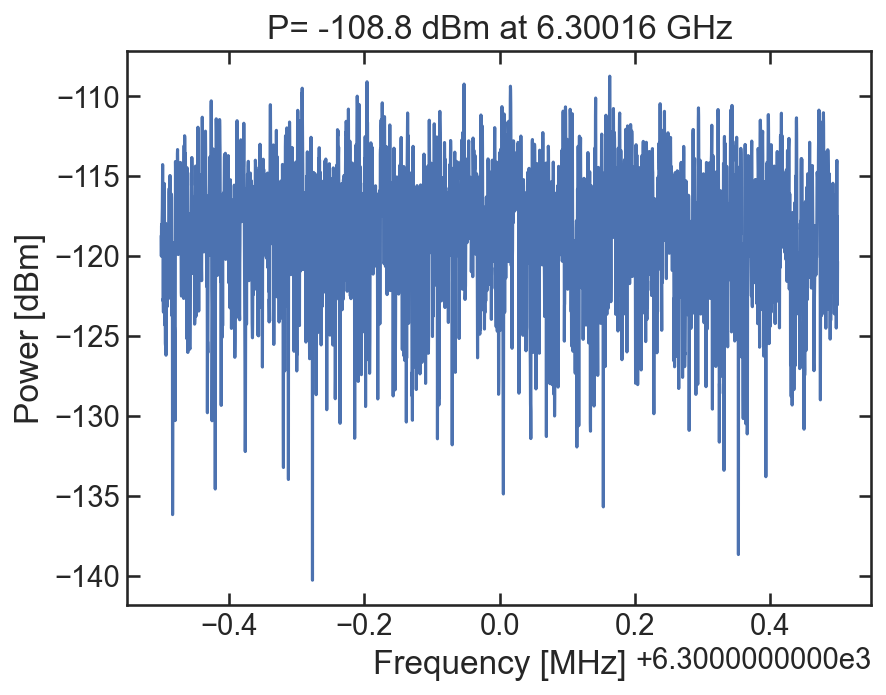

-108.75755310058594 dBm at 6.300163018111644 GHz


-108.75755

In [233]:
qb.update_value('qubit_LO',6e9)
qb.get_power(fc=qb.pars['qubit_LO'],threshold=-20,sa_span=1e6,config=True,plot=True)   

Updating n_avg to 5000
Updating rr_freq to 7618050000.0
Updating readout_atten to 27
Setting DA attenuation to 27.
Updating rr_LO to 7568050000.0
Setting readout_LO frequency to 7568050000.0.
Updating qubit_LO to 6600000000.0
Setting qubit_LO frequency to 6600000000.0.
Setting sa frequency to 6600000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -30.
Setting sa bandwidth to 1000.0.
LO at 6.6 GHz
Current I_offset = 0.0 mV, Current Q_offset = 0.0 mV
Setting sa frequency to 6600000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -87.99136352539062.
Setting sa bandwidth to 1000.0.


100%|██████████| 121/121 [00:13<00:00,  9.13it/s]


Updating qubit_mixer_offsets to [0.0019500000000000003, -0.0010499999999999997]
optimal I_offset = 2.0 mV, optimal Q_offset = -1.0 mV
Power: -112.87254333496094 dBm at 6.6 GHz


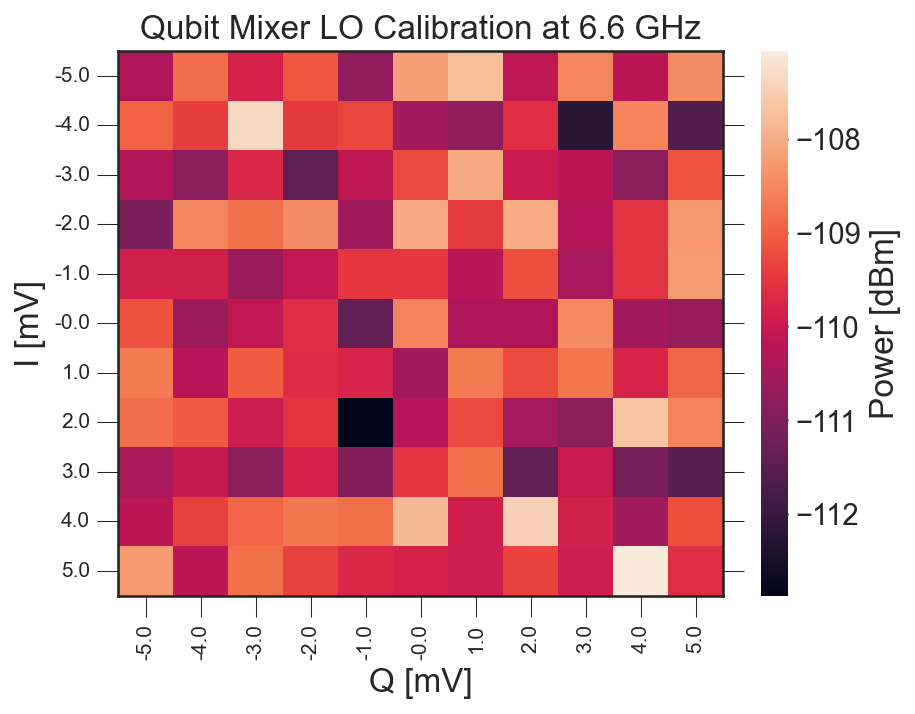

Updating qubit_IF to 50000000.0
2024-04-05 18:26:34,275 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:26:34,371 - qm - INFO     - Executing program
Setting sa frequency to 6550000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.


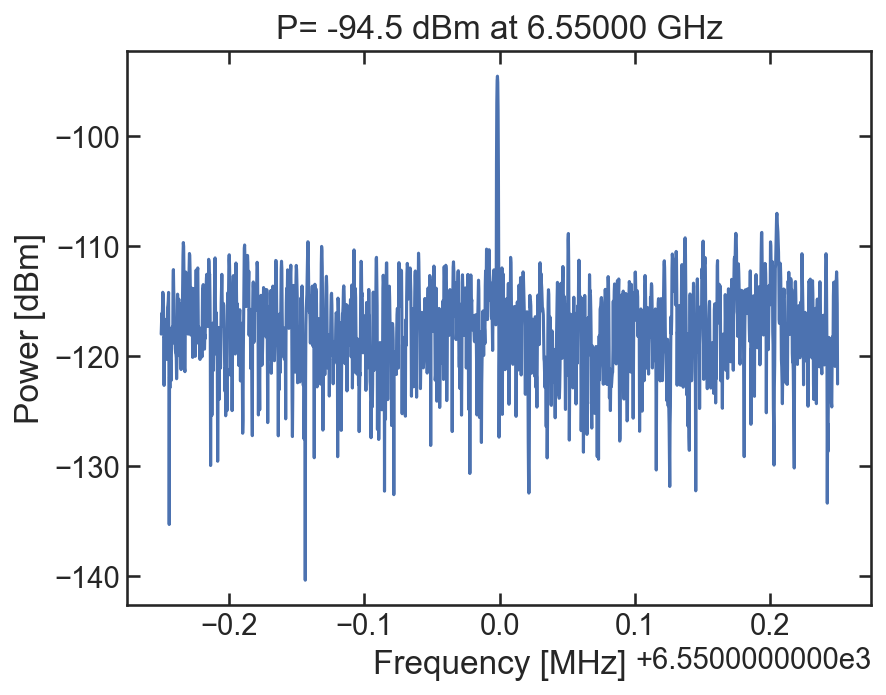

-94.51551818847656 dBm at 6.549998439754475 GHz
Sideband at 6.55 GHz
Current gain = 0, Current phase = 0


100%|██████████| 100/100 [00:10<00:00,  9.32it/s]


Updating qubit_mixer_imbalance to (0.1, -0.25)
optimal gain = 0.1, optimal phi = -0.25
Power: -108.33206939697266 dBm at 6.55 GHz


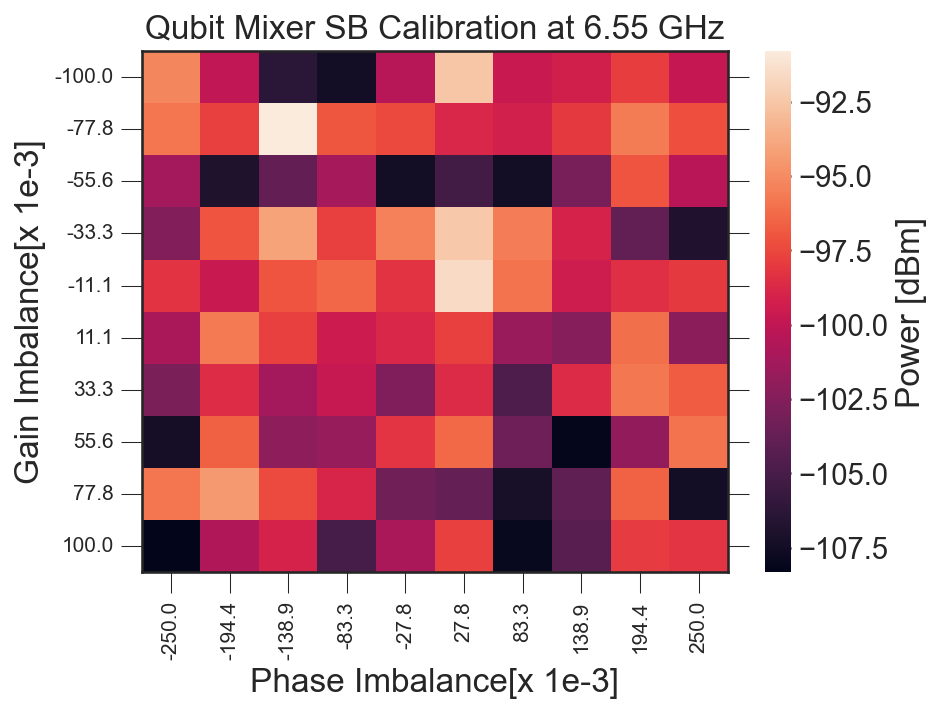

Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7568050000.0.
Setting sa span to 500000.0.
Setting sa threshold to -30.
Setting sa bandwidth to 1000.0.
LO at 7.56805 GHz
Current I_offset = -11.1 mV, Current Q_offset = 2.9 mV
Setting sa frequency to 7568050000.0.
Setting sa span to 500000.0.
Setting sa threshold to -48.328941345214844.
Setting sa bandwidth to 1000.0.


100%|██████████| 121/121 [00:13<00:00,  8.80it/s]


Updating rr_mixer_offsets to [-0.011199999999999991, 0.0028000000000000013]
optimal I_offset = -11.2 mV, optimal Q_offset = 2.8 mV
Updating readout_atten to 27
Setting DA attenuation to 27.
Power: -98.02005004882812 dBm at 7.56805 GHz


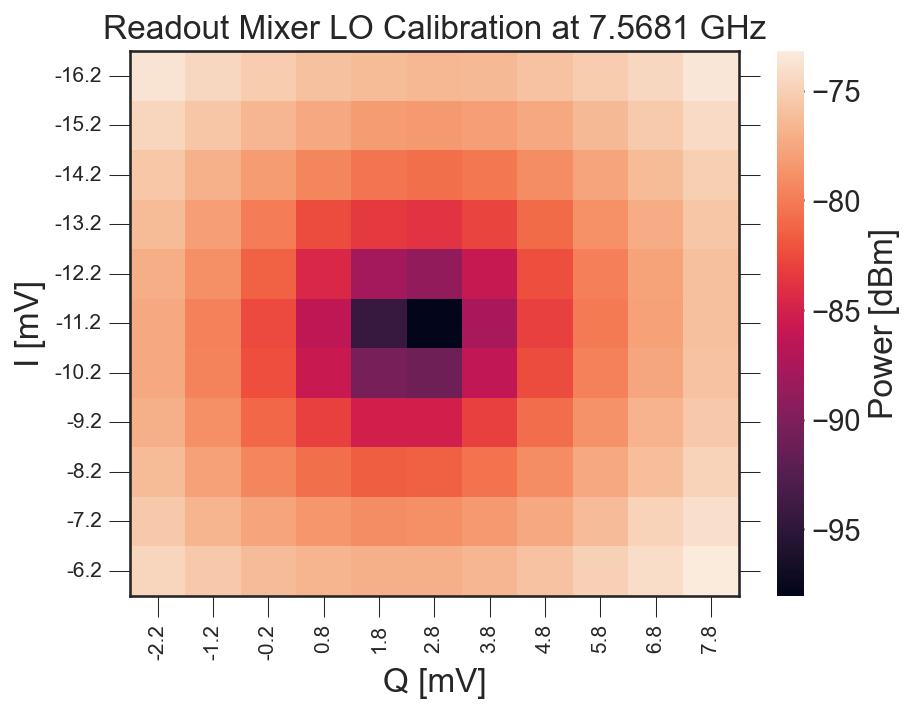

Updating rr_IF to 50000000.0
2024-04-05 18:27:02,502 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:27:02,600 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7518050000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.


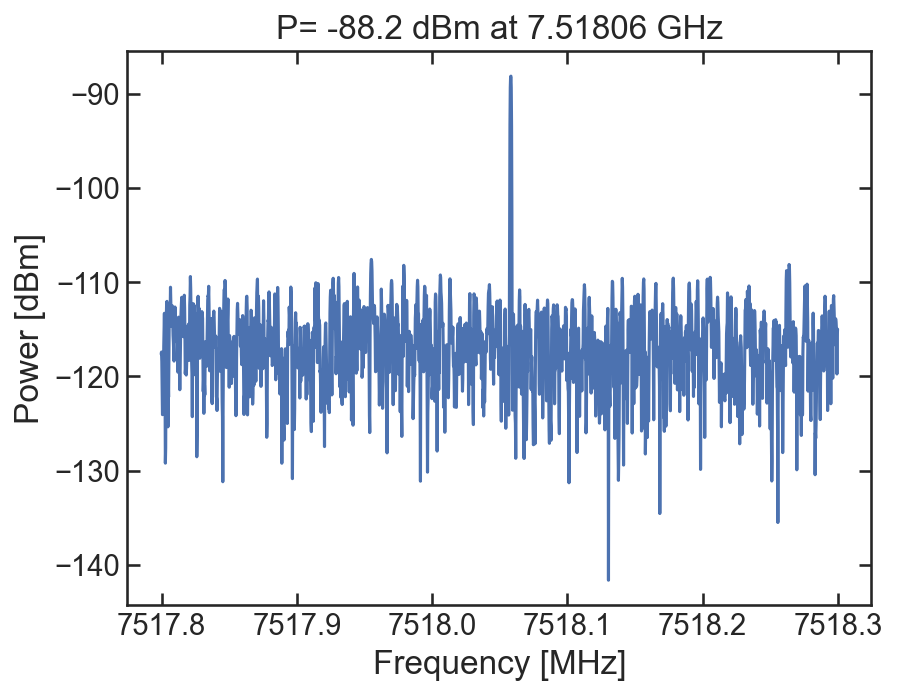

-88.15798950195312 dBm at 7.518058266816524 GHz
Sideband at 7.51805 GHz
Current gain = 0.0, Current phase = -0.0556


100%|██████████| 100/100 [00:10<00:00,  9.28it/s]


Updating rr_mixer_imbalance to (-0.011111111111111113, -0.02777777777777779)
optimal gain = -0.0111, optimal phi = -0.0278
Updating readout_atten to 27
Setting DA attenuation to 27.
Power: -92.07398986816406 dBm at 7.51805 GHz


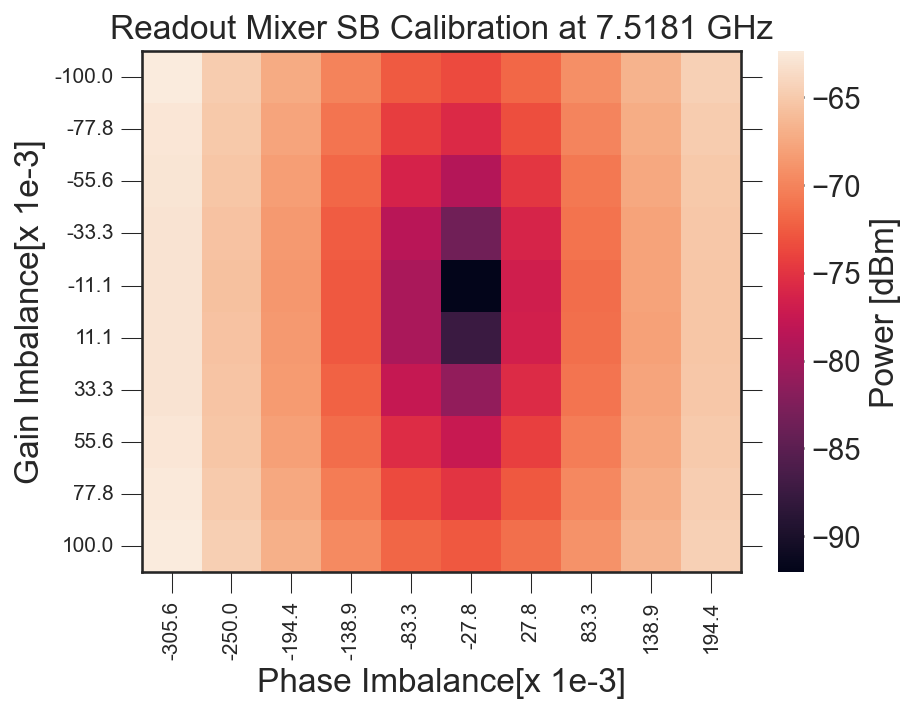

2024-04-05 18:27:15,377 - qm - INFO     - Performing health check
2024-04-05 18:27:15,407 - qm - INFO     - Health check passed
2024-04-05 18:27:15,962 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:27:16,172 - qm - INFO     - Executing program


100%|█████████▉| 4999/5000 [04:38<00:00, 17.93it/s]


In [228]:
amp_q_scaling = 1
qb.update_value('n_avg',5000)
qb.update_value('rr_freq', 7.61805e9)
# qb.update_value('rr_IF', 50e6)
# qb.update_value('smearing',40)
# qb.update_value('tof',292)
qb.update_value('readout_atten',27)
qb.update_value('rr_LO', qb.pars['rr_freq'] - qb.pars['rr_IF'])
qb.pars['resettime']['qubit'] = int(20e3)
qb.write_pars()
qb.experiment = 'qubit_spec'
data, job = qb.qubit_spec(element='qubit',
                                check_mixers=True,
                                IF_min=50e6,
                                IF_max=200e6,
                                f_LO=6.6e9,
                                df=0.5e6,
                                on_off=True,
                                amp_q_scaling = amp_q_scaling,
                                saturation_dur = 20e3,
                                showprogress=True,
                                savedata=False)

Peak threshold at 0.002887653628002083


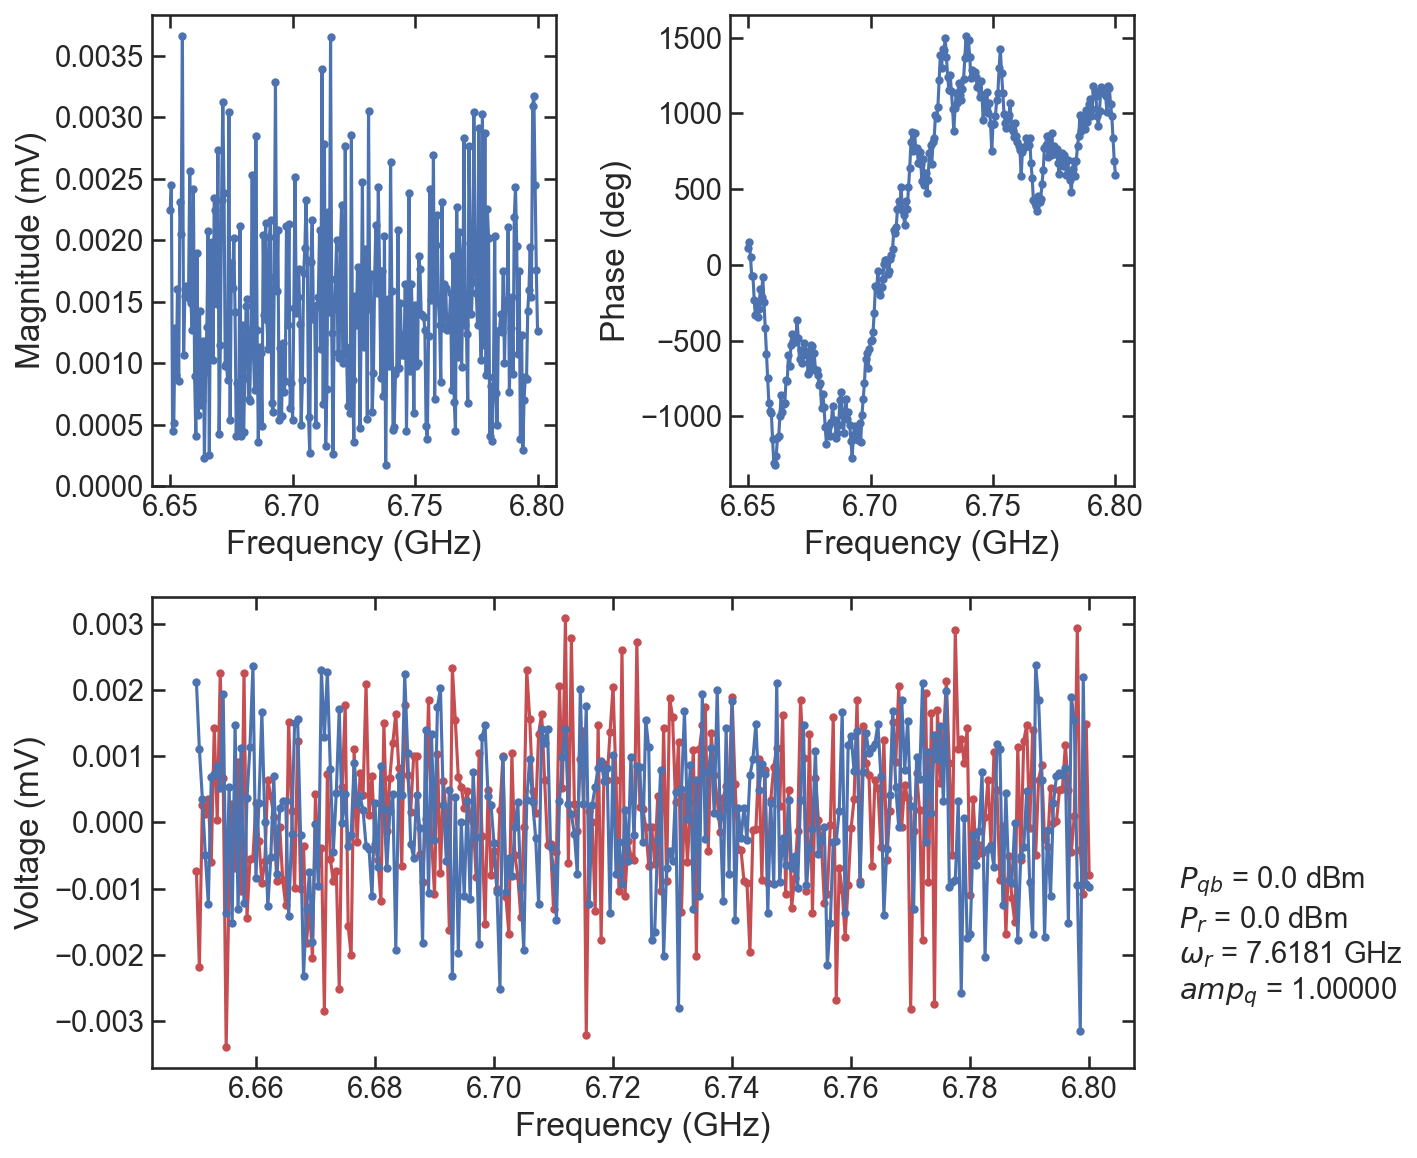

In [229]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,find_peaks=True, amp_q_scaling=amp_q_scaling)

## Run broad spectroscopy scan on qubit

In [217]:
qb._instruments.set('sa','frequency',6e9)
qb.pars['resettime']['qubit'] = int(5e3)

Setting sa frequency to 6000000000.0.


In [222]:
qb.update_value('n_avg',2000)
qb.update_value('rr_freq', 7.61805e9)
qb.update_value('rr_IF', 50e6)
qb.update_value('rr_LO', qb.pars['rr_freq'] - qb.pars['rr_IF'])
qb.pars['resettime']['qubit'] = int(10e3)
qb.write_pars()
df_qubit_spec = 2e6
data, job = qb.run_scan(df = df_qubit_spec, element='qubit',
                                check_mixers=False,
                                chunksize = 200e6,
                                lo_min = 6e9,
                                lo_max = 7e9,
                                amp_q_scaling = 1,
                                on_off=True,
                                saturation_dur = 20e3,                   
                                showprogress=True,
                                savedata=False)

Updating n_avg to 2000
Updating rr_freq to 7618050000.0
Updating rr_IF to 50000000.0
Updating rr_LO to 7568050000.0
Setting readout_LO frequency to 7568050000.0.


  0%|          | 0/6 [00:00<?, ?it/s]

Updating qubit_LO to 6000000000.0
Setting qubit_LO frequency to 6000000000.0.
2024-04-05 18:18:32,734 - qm - INFO     - Performing health check
2024-04-05 18:18:32,746 - qm - INFO     - Health check passed
2024-04-05 18:18:33,131 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:18:33,337 - qm - INFO     - Executing program


 17%|█▋        | 1/6 [00:30<02:31, 30.31s/it]

Updating qubit_LO to 6200000000.0
Setting qubit_LO frequency to 6200000000.0.
2024-04-05 18:19:03,010 - qm - INFO     - Performing health check
2024-04-05 18:19:03,022 - qm - INFO     - Health check passed
2024-04-05 18:19:03,404 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:19:03,883 - qm - INFO     - Executing program


 33%|███▎      | 2/6 [01:00<02:01, 30.28s/it]

Updating qubit_LO to 6400000000.0
Setting qubit_LO frequency to 6400000000.0.
2024-04-05 18:19:33,300 - qm - INFO     - Performing health check
2024-04-05 18:19:33,311 - qm - INFO     - Health check passed
2024-04-05 18:19:33,673 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:19:34,136 - qm - INFO     - Executing program


 50%|█████     | 3/6 [01:30<01:30, 30.26s/it]

Updating qubit_LO to 6600000000.0
Setting qubit_LO frequency to 6600000000.0.
2024-04-05 18:20:03,525 - qm - INFO     - Performing health check
2024-04-05 18:20:03,539 - qm - INFO     - Health check passed
2024-04-05 18:20:03,887 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:20:04,121 - qm - INFO     - Executing program


 67%|██████▋   | 4/6 [02:01<01:00, 30.27s/it]

Updating qubit_LO to 6800000000.0
Setting qubit_LO frequency to 6800000000.0.
2024-04-05 18:20:33,813 - qm - INFO     - Performing health check
2024-04-05 18:20:33,825 - qm - INFO     - Health check passed
2024-04-05 18:20:34,177 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:20:34,392 - qm - INFO     - Executing program


 83%|████████▎ | 5/6 [02:31<00:30, 30.27s/it]

Updating qubit_LO to 7000000000.0
Setting qubit_LO frequency to 7000000000.0.
2024-04-05 18:21:04,081 - qm - INFO     - Performing health check
2024-04-05 18:21:04,094 - qm - INFO     - Health check passed
2024-04-05 18:21:04,463 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 18:21:04,644 - qm - INFO     - Executing program


100%|██████████| 6/6 [03:01<00:00, 30.27s/it]


Peak threshold at 0.004588131502916306


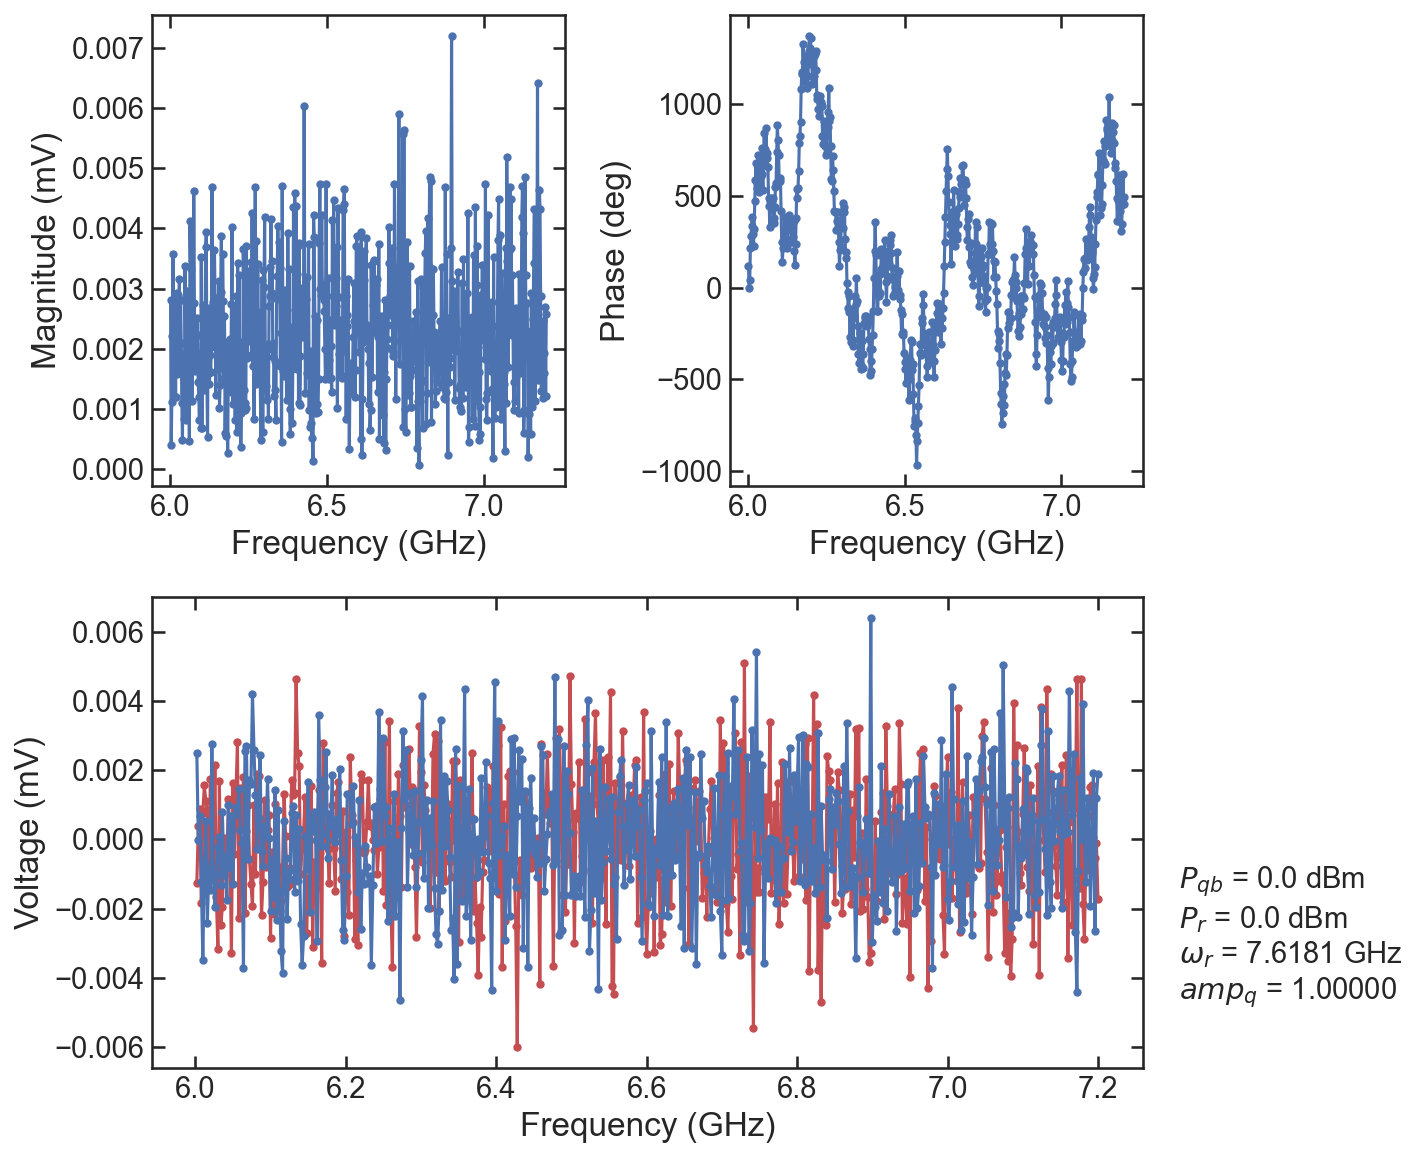

In [224]:
%matplotlib inline
pf.qubit_spec_plot(data,qb_pars=qb.pars,df=df_qubit_spec,rrFreq=qb.pars['rr_freq'],amp_q_scaling=1)